In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [152]:
df = pd.read_excel('C:/Users/test4/Desktop/대학 강의/2-2/데이터처리프로그래밍/dataset/kkk.xlsx')
df.head(10)

,이름,당도,아삭함,종류
0,오렌지,7,3,과일
1,포도,8,5,과일
2,견과류,3,6,단백질
3,새우,2,3,단백질
4,생선,3,1,단백질
5,콩,3,7,채소
6,베이컨,1,4,단백질
7,바나나,10,1,과일
8,배,10,7,과일
9,오이,2,8,채소


In [153]:
le=LabelEncoder()

df['이름']=le.fit_transform(df['이름'])

df.head(10)

,이름,당도,아삭함,종류
0,10,7,3,과일
1,14,8,5,과일
2,0,3,6,단백질
3,6,2,3,단백질
4,8,3,1,단백질
5,13,3,7,채소
6,4,1,4,단백질
7,2,10,1,과일
8,3,10,7,과일
9,11,2,8,채소


In [154]:
df2 = df.drop(['종류','이름'],axis=1)

df2

,당도,아삭함
0,7,3
1,8,5
2,3,6
3,2,3
4,3,1
5,3,7
6,1,4
7,10,1
8,10,7
9,2,8


In [155]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2)

print(f'cluster{kmeans.labels_}')
print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')
#kmeans.score(np2)

cluster[1 1 2 0 0 2 0 1 1 2 0 2 1 2 2]
중심점: [[1.75       2.25      ]
 [9.         5.        ]
 [2.83333333 8.33333333]]
응집도: 79.66666666666667


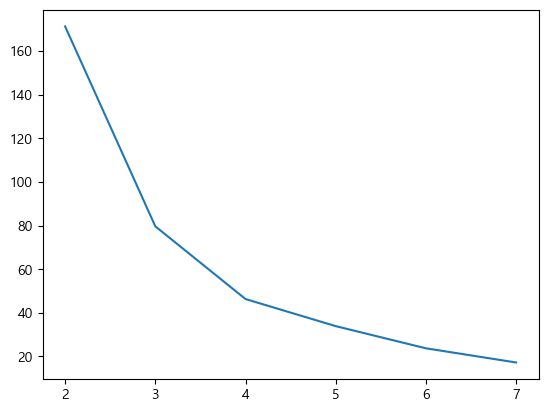

In [156]:
temp=[]
for i in range(2,8):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df2)
  temp.append(kmeans.inertia_)
plt.plot(range(2,8),temp)

Text(0, 0.5, '아삭함')

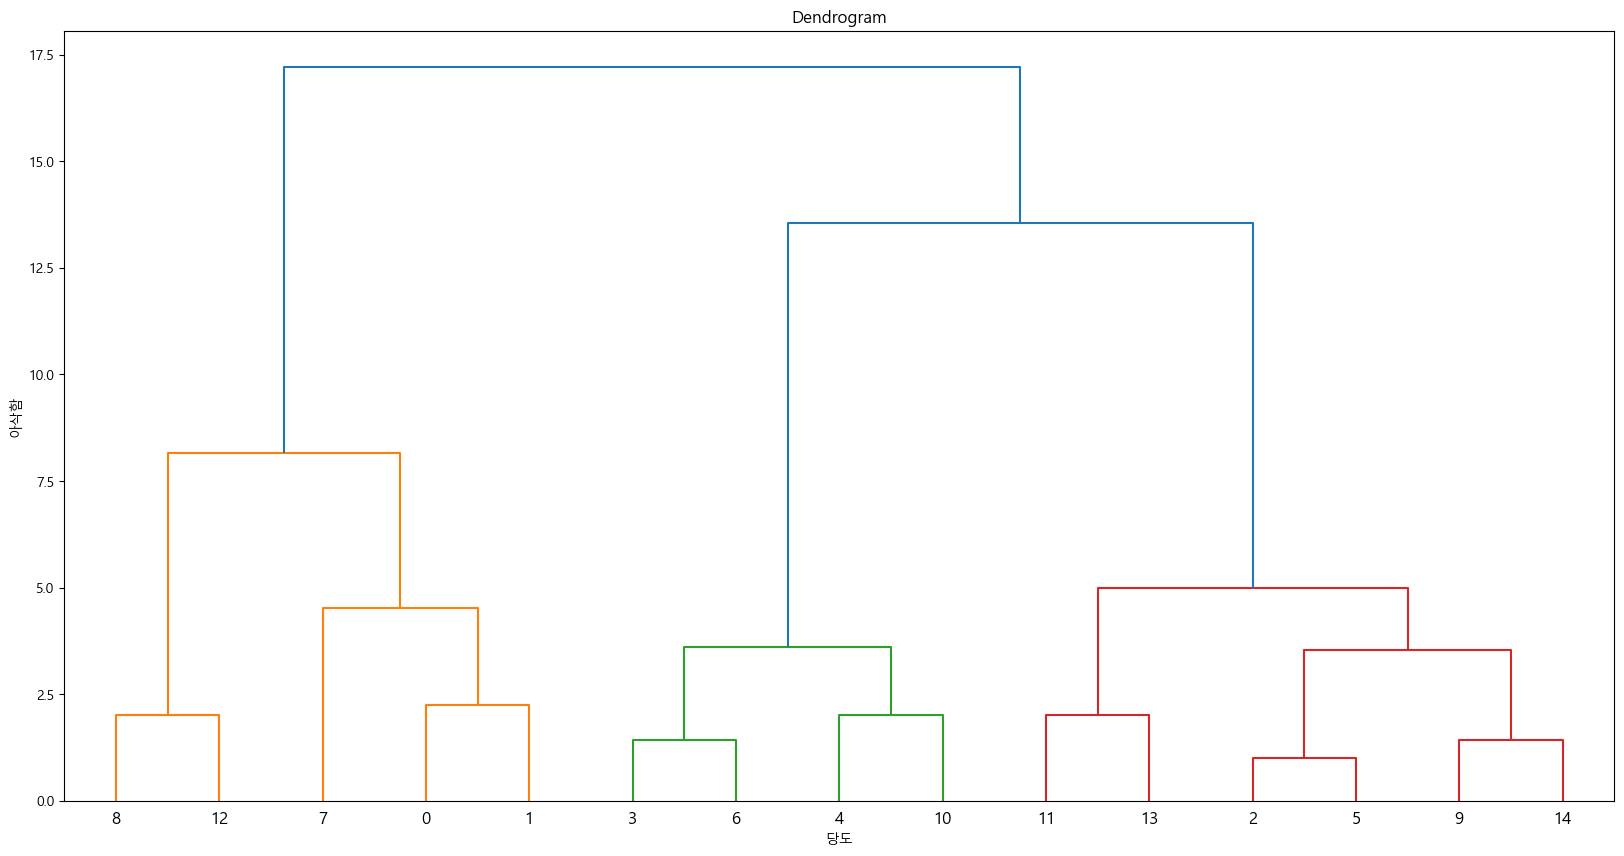

In [157]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,10))
cluster=linkage(df2,method='ward')

dendrogram(cluster)
plt.title('Dendrogram')
plt.xlabel('당도')
plt.ylabel('아삭함')

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y = df['종류']

X = df.drop(['종류','이름'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=36, shuffle= True)

In [159]:
from sklearn.model_selection import cross_val_score

knn=KNeighborsClassifier()
scores=cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.6666666666666666
2번째 정확도: 0.6666666666666666
3번째 정확도: 0.6666666666666666
4번째 정확도: 0.5


C:\Users\test4\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


In [160]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
print(f'클래스의 종류:{neigh.classes_}')
print(f'거리계산방법:{neigh.effective_metric_}')
print(f'훈련데이터 샘플 수:{neigh.n_samples_fit_}')

클래스의 종류:['과일' '단백질' '채소']
거리계산방법:euclidean
훈련데이터 샘플 수:11


In [161]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,neigh.predict(X_test)))

Train set Accuracy:  0.9090909090909091
Test set Accuracy:  1.0


In [162]:
print(neigh.score(X_test,y_test))

1.0


In [163]:
new_x = [4,9]

prediction = neigh.predict([new_x])
prediction

C:\Users\test4\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['채소'], dtype=object)

In [164]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
1.0
[[1 0 0]
 [0 1 0]
 [0 0 2]]
